0. Importation

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = os.path.realpath(os.getcwd() + "\\dataset")
print(dataset_path)

C:\Users\Administrateur\Jupyterre\Projechts\ENGIE_VIE\dataset


1. Exploratory Analysis of the Data 

In [7]:
#Import the csv files
ppr_data = pd.read_csv(dataset_path + '\\power_prices_realized.csv')
plf_data = pd.read_csv(dataset_path + '\\power_load_forecast.csv')
rpf_data = pd.read_csv(dataset_path + '\\renewables_production_forecast.csv')
dataset = [ppr_data, plf_data, rpf_data]

#Transform the first column to datetype 
for data in dataset:
    data['delivery_time_utc'] = pd.to_datetime(data['delivery_time_utc'])
    data.sort_values(by='delivery_time_utc', inplace = True)

print(f"The time period covered by the power prices realized dataset is {ppr_data['delivery_time_utc'].iloc[-1] - ppr_data['delivery_time_utc'].iloc[0]} and ranged from {ppr_data['delivery_time_utc'].iloc[0]} to {ppr_data['delivery_time_utc'].iloc[-1]}")
print(f"The time period covered by the power load forecast dataset is {plf_data['delivery_time_utc'].iloc[-1] - plf_data['delivery_time_utc'].iloc[0]} and ranged from {plf_data['delivery_time_utc'].iloc[0]} to {plf_data['delivery_time_utc'].iloc[-1]}")
print(f"The time period covered by the renewables production forecast dataset is {rpf_data['delivery_time_utc'].iloc[-1] - rpf_data['delivery_time_utc'].iloc[0]} and ranged from {rpf_data['delivery_time_utc'].iloc[0]} to {rpf_data['delivery_time_utc'].iloc[-1]}")

ppr_data.describe(), plf_data.describe(), rpf_data.describe()

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_14208\572549316.py:9: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['delivery_time_utc'] = pd.to_datetime(data['delivery_time_utc'])


The time period covered by the power prices realized dataset is 703 days 23:00:00 and ranged from 2021-12-31 23:00:00 to 2023-12-05 22:00:00
The time period covered by the power load forecast dataset is 703 days 23:00:00 and ranged from 2021-12-31 23:00:00 to 2023-12-05 22:00:00
The time period covered by the renewables production forecast dataset is 703 days 23:45:00 and ranged from 2021-12-31 23:00:00 to 2023-12-05 22:45:00


(                   delivery_time_utc      da_price
 count                          53653  53653.000000
 mean   2022-10-30 21:20:18.915997184    194.254424
 min              2021-12-31 23:00:00   -120.000000
 25%              2022-05-20 18:00:00     99.990000
 50%              2022-10-07 11:15:00    163.950000
 75%              2023-03-30 00:45:00    256.580000
 max              2023-12-05 22:00:00    871.000000
 std                              NaN    131.428082,
                    delivery_time_utc  power_demand_forecast
 count                          16940           16940.000000
 mean   2022-12-19 18:39:11.688311808            9199.044215
 min              2021-12-31 23:00:00            3153.000000
 25%              2022-06-26 09:45:00            8183.750000
 50%              2022-12-19 21:30:00            9183.500000
 75%              2023-06-14 08:15:00           10158.000000
 max              2023-12-05 22:00:00           12965.000000
 std                              NaN      

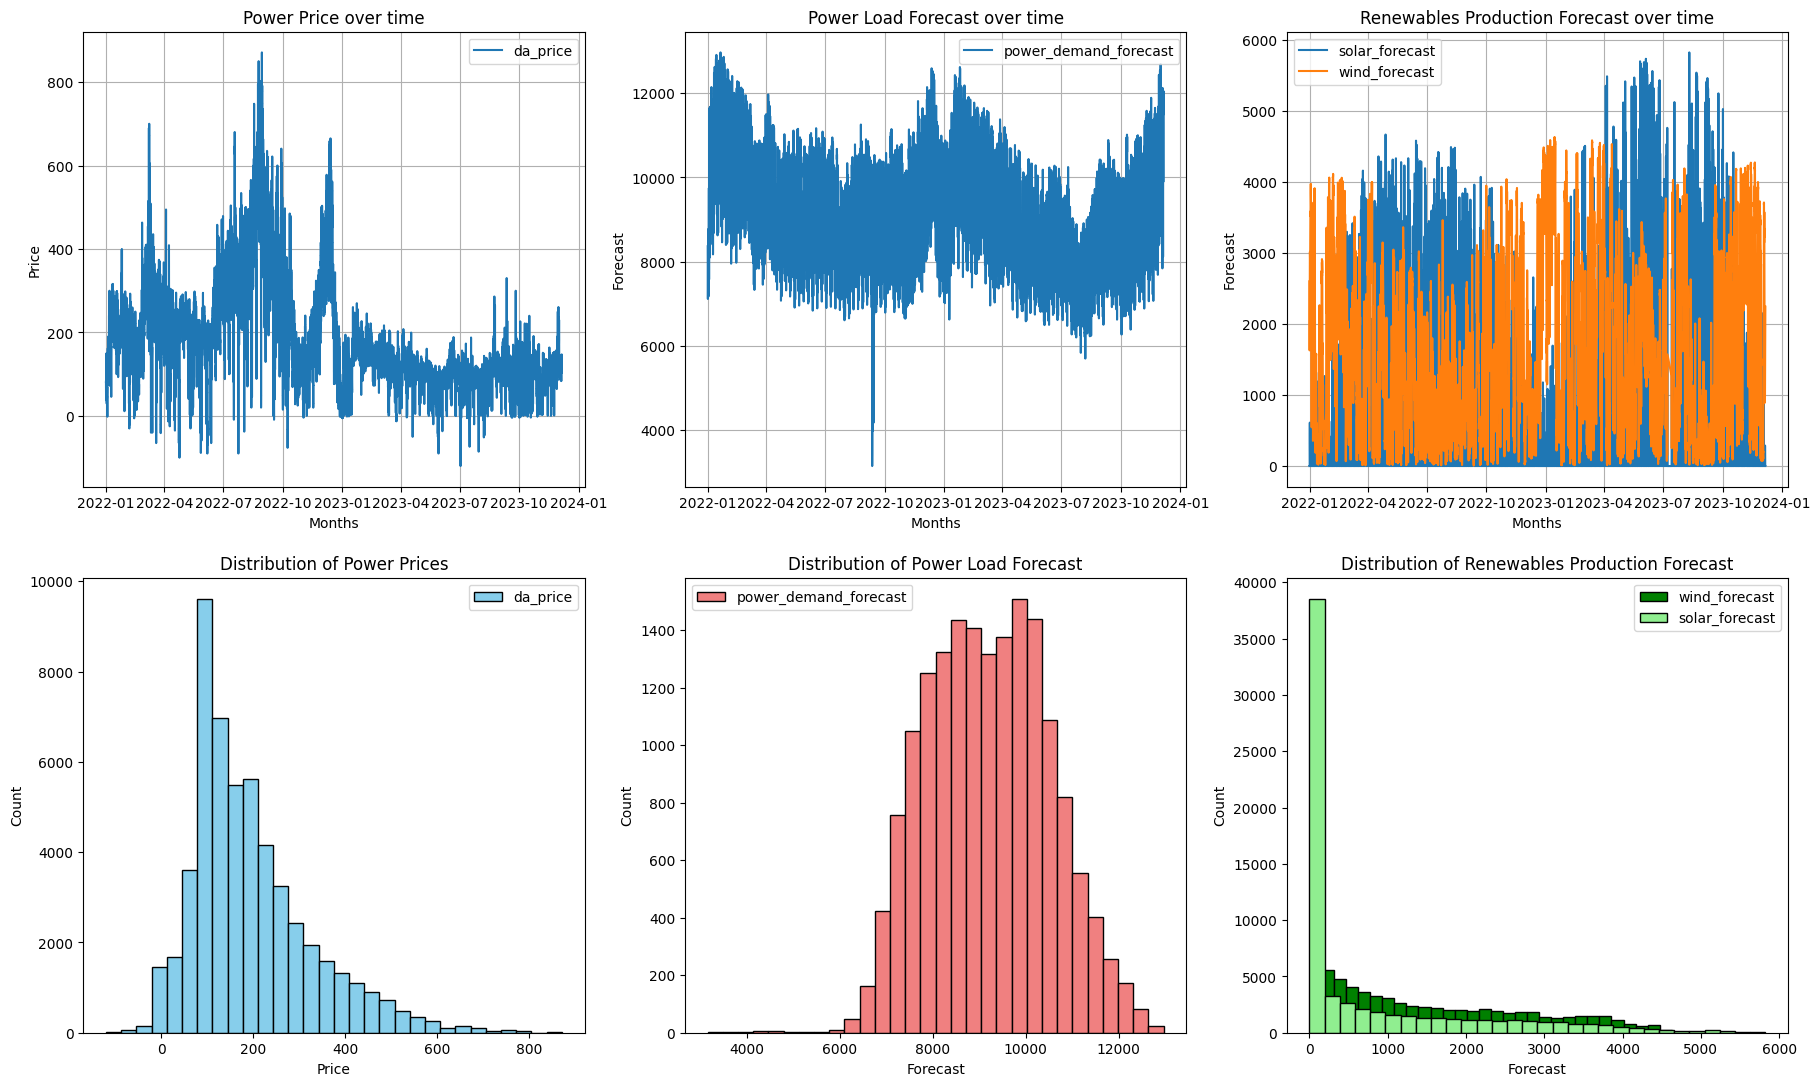

In [8]:
#Overview statistics
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (22,13))

axes[0,0].plot(ppr_data["delivery_time_utc"], ppr_data["da_price"], label = 'da_price')
axes[0,0].set_title('Power Price over time')
axes[0,0].set_ylabel("Price")

axes[0,1].plot(plf_data["delivery_time_utc"], plf_data["power_demand_forecast"], label = 'power_demand_forecast')
axes[0,1].set_title('Power Load Forecast over time')
axes[0,1].set_ylabel("Forecast")

axes[0,2].plot(rpf_data["delivery_time_utc"], rpf_data['solar_forecast'], label = 'solar_forecast')
axes[0,2].plot(rpf_data["delivery_time_utc"], rpf_data['wind_forecast'], label = 'wind_forecast')
axes[0,2].set_title('Renewables Production Forecast over time')
axes[0,2].set_ylabel("Forecast")

for ax in axes.flat[:3]:    
    ax.set_xlabel('Months')
    ax.grid('on')
    ax.legend(loc='best')

axes[1, 0].hist(ppr_data['da_price'], bins = 30, color = 'skyblue', edgecolor = 'black', label = 'da_price')
axes[1, 0].set_title('Distribution of Power Prices')
axes[1, 0].set_xlabel('Price')

axes[1, 1].hist(plf_data['power_demand_forecast'], bins = 30, color = 'lightcoral', edgecolor = 'black', label = 'power_demand_forecast')
axes[1, 1].set_title('Distribution of Power Load Forecast')
axes[1, 1].set_xlabel('Forecast')

axes[1, 2].hist(rpf_data['wind_forecast'], bins = 30, color = 'green', edgecolor = 'black', label = 'wind_forecast')
axes[1, 2].hist(rpf_data['solar_forecast'], bins = 30, color = 'lightgreen', edgecolor = 'black', label = 'solar_forecast')
axes[1, 2].set_title('Distribution of Renewables Production Forecast')
axes[1, 2].set_xlabel('Forecast')

for ax in axes.flat[3:]:    
    ax.set_ylabel('Count')
    ax.legend(loc='best')

plt.show()

Analysis :
- Same fluctuation
- Repeated trends
- Constant mean
- Stationarity ?
- Hard to see patterns to predict

In [9]:
ppr_data['day'] = ppr_data["delivery_time_utc"].dt.date
ppr_data_mean = ppr_data.groupby(ppr_data['day']).mean().drop(columns=['delivery_time_utc'])
ppr_data_mean['da_price_mean_one_day_before'] = ppr_data_mean.shift(1)

df = pd.merge(ppr_data, ppr_data_mean, on = 'day', how = 'inner')
df = df.drop(columns=['da_price_y'])
df = df.rename(columns={"da_price_x": "da_price"}).dropna() #drop

ppr_data = df

plf_data_mean = plf_data.groupby(plf_data["delivery_time_utc"].dt.date).mean().drop(columns=['delivery_time_utc'])
rpf_data_mean = rpf_data.groupby(rpf_data["delivery_time_utc"].dt.date).mean().drop(columns=['delivery_time_utc'])

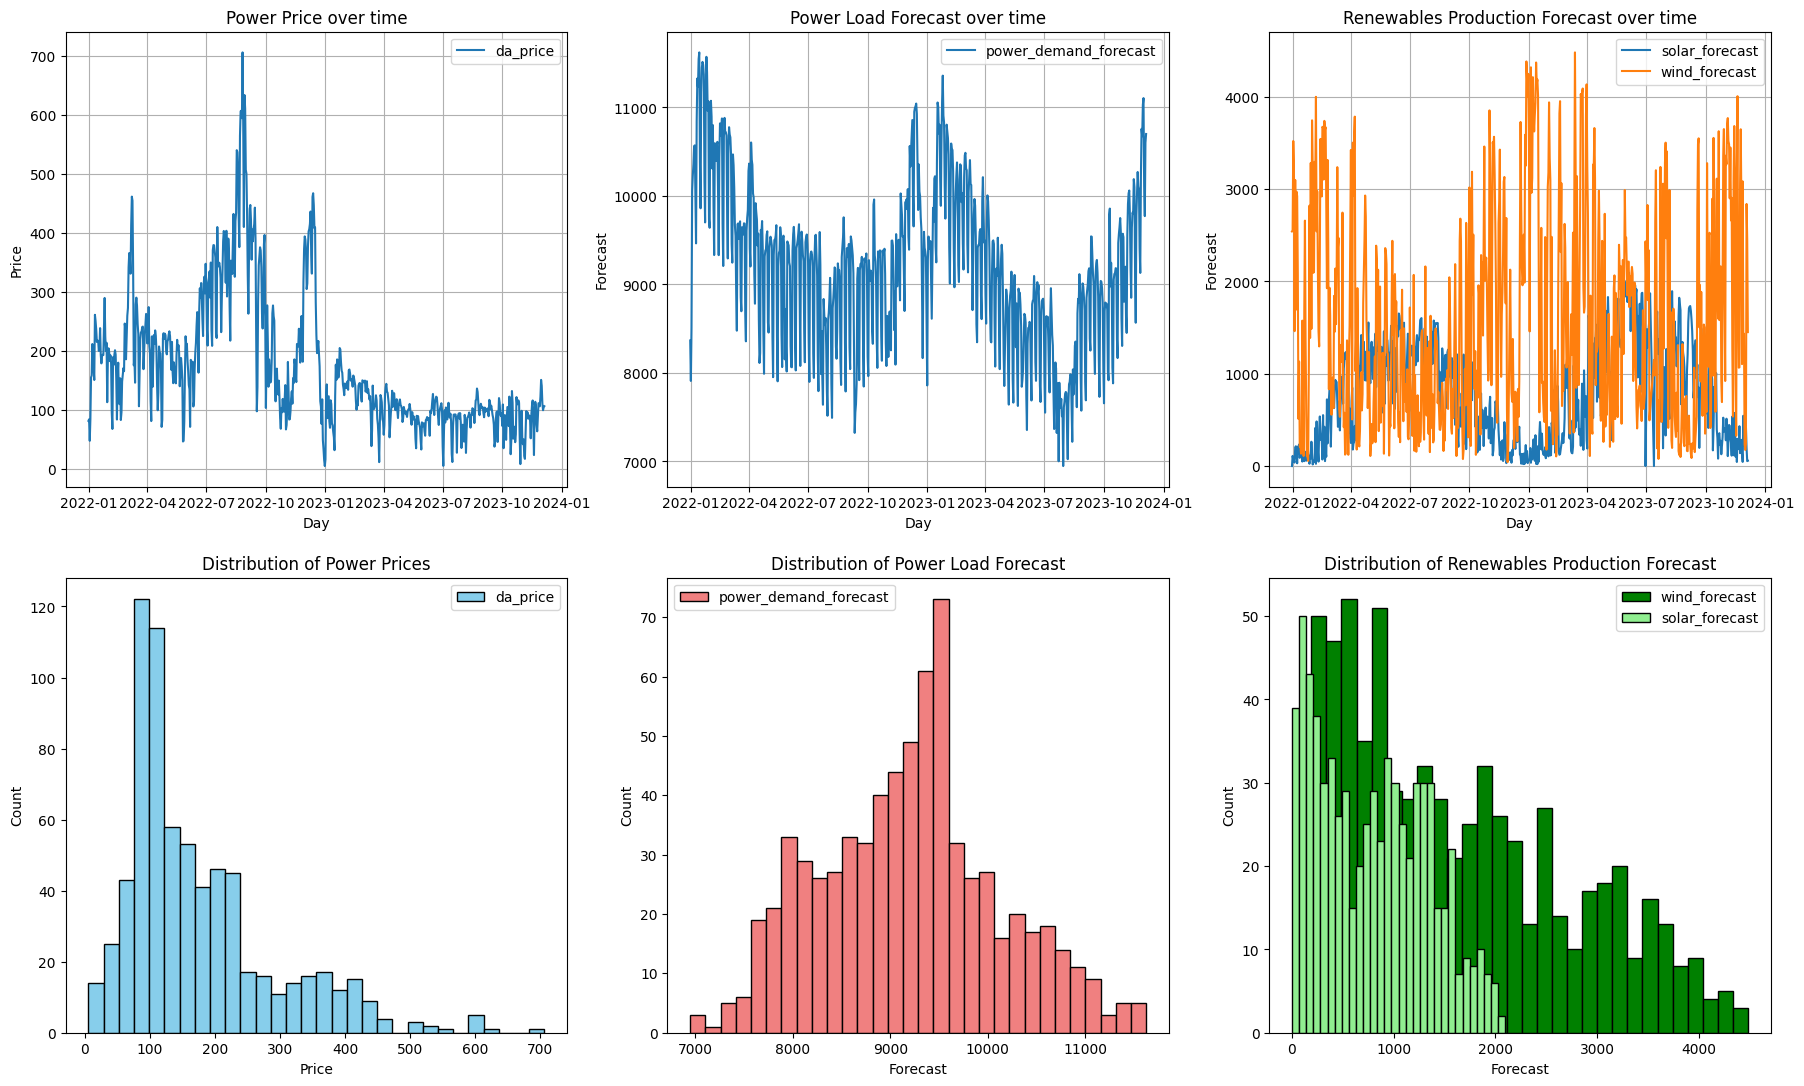

In [11]:
#Overview statistics
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (22,13))

axes[0,0].plot(ppr_data_mean["da_price"], label = 'da_price')
axes[0,0].set_title('Power Price over time')
axes[0,0].set_ylabel("Price")

axes[0,1].plot(plf_data_mean["power_demand_forecast"], label = 'power_demand_forecast')
axes[0,1].set_title('Power Load Forecast over time')
axes[0,1].set_ylabel("Forecast")

axes[0,2].plot(rpf_data_mean['solar_forecast'], label = 'solar_forecast')
axes[0,2].plot(rpf_data_mean['wind_forecast'], label = 'wind_forecast')
axes[0,2].set_title('Renewables Production Forecast over time')
axes[0,2].set_ylabel("Forecast")

for ax in axes.flat[:3]:    
    ax.set_xlabel('Day')
    ax.grid('on')
    ax.legend(loc='best')

axes[1, 0].hist(ppr_data_mean['da_price'], bins = 30, color = 'skyblue', edgecolor = 'black', label = 'da_price')
axes[1, 0].set_title('Distribution of Power Prices')
axes[1, 0].set_xlabel('Price')

axes[1, 1].hist(plf_data_mean['power_demand_forecast'], bins = 30, color = 'lightcoral', edgecolor = 'black', label = 'power_demand_forecast')
axes[1, 1].set_title('Distribution of Power Load Forecast')
axes[1, 1].set_xlabel('Forecast')

axes[1, 2].hist(rpf_data_mean['wind_forecast'], bins = 30, color = 'green', edgecolor = 'black', label = 'wind_forecast')
axes[1, 2].hist(rpf_data_mean['solar_forecast'], bins = 30, color = 'lightgreen', edgecolor = 'black', label = 'solar_forecast')
axes[1, 2].set_title('Distribution of Renewables Production Forecast')
axes[1, 2].set_xlabel('Forecast')

for ax in axes.flat[3:]:    
    ax.set_ylabel('Count')
    ax.legend(loc='best')

plt.show()

2. Forecast model

In [320]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Merging and inner join on the time 
merged_df = pd.merge(plf_data, ppr_data, on = 'delivery_time_utc', how = 'inner')
merged_df = pd.merge(merged_df, rpf_data, on = 'delivery_time_utc', how = 'inner')

#merged_df_mean = pd.merge(plf_data_mean, ppr_data_mean, on = 'delivery_time_utc', how = 'inner')
#merged_df_mean = pd.merge(merged_df_mean, rpf_data_mean, on = 'delivery_time_utc', how = 'inner')

# Select features X and label y:
X = merged_df[['power_demand_forecast', 'solar_forecast', 'wind_forecast', 'da_price_mean_one_day_before']]
#X = merged_df[['power_demand_forecast', 'solar_forecast', 'wind_forecast']]
y = merged_df['da_price']

#X = merged_df_mean[['power_demand_forecast', 'solar_forecast', 'wind_forecast']]
#y = merged_df_mean['da_price']

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(X, y, test_size = 0.40, random_state = 1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size = 0.50, random_state = 1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

# Features scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)

the shape of the training set (input) is: (10124, 4)
the shape of the training set (target) is: (10124,)

the shape of the cross validation set (input) is: (3375, 4)
the shape of the cross validation set (target) is: (3375,)

the shape of the test set (input) is: (3375, 4)
the shape of the test set (target) is: (3375,)


In [323]:
# Simple regression model

#Features X : 
#       - power_demand_forecast
#       - wind_forecast
#       - solar_forecast

#Label y :
#       - da_price

#x_train_scaled_1 = x_train_scaled[:,:-1]
#x_cv_scaled_1 = x_cv_scaled[:,:-1]
#x_test_scaled_1 = x_test_scaled[:,:-1]

# Create and train a linear regression model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# Make predictions on the scaled training set
predictions_scaled = model.predict(x_train_scaled)

# Evaluate the model on the training set
mse_scaled = mean_squared_error(y_train, predictions_scaled)

print(f'Training set MSE: {mse_scaled}')

# Scale the cross validation set using the mean and standard deviation of the training set
#X_cv_scaled = scaler.transform(x_cv)

# Feed the scaled cross validation set
yhat = model.predict(x_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training set MSE: 3126.6485898673413
Cross validation MSE: 1619.4089054480874


In [254]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree = 2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# x1**2, x1x2 x1x3 x2**2 x2x3 x3**2

# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

#Conclusion : it's better with 2nd order polynomial

Training MSE: 1371.0842020501796
Cross validation MSE: 1398.6311658392394


In [255]:
# Initialize lists containing the lists, models, and scalers
degrees = range(1,11)
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in degrees:
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias = False)
    X_train_mapped = poly.fit_transform(x_train)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train)
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    

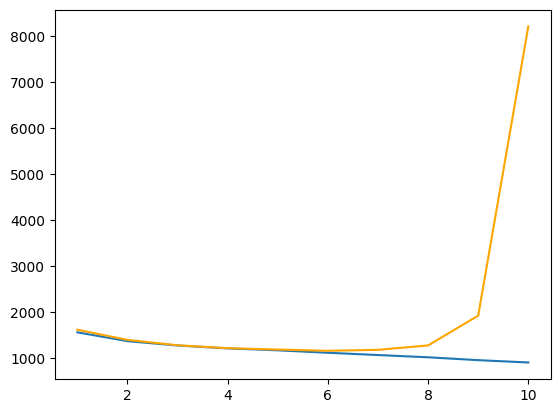

Lowest CV MSE is found in the model with degree = 6
Training MSE: 1118.85
Cross Validation MSE: 1161.66
Test MSE: 1180.24


In [327]:
plt.plot(degrees, train_mses)
plt.plot(degrees, cv_mses, color='orange')
plt.show()

degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree = {degree}")

# Add polynomial features to the test set
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Final Model

In [329]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree = 2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Add the polynomial features to the cross validation set
X_test_mapped = poly.transform(x_test)

# Scale the cross validation set using the mean and standard deviation of the training set
X_test_mapped_scaled = scaler_poly.transform(X_test_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

# Compute the cross validation MSE
yhat = model.predict(X_test_mapped_scaled)
print(f"Test MSE: {mean_squared_error(y_test, yhat) / 2}")

Training MSE: 1371.0842020501796
Cross validation MSE: 1398.6311658392394
Test MSE: 1379.8549129468406


In [376]:
model.coef_

array([ 57.78072353, -39.11963935, -14.46427814,  42.32399565,
       -53.46384169,  42.7509195 ,  51.82356422,  62.59593297,
        -7.27641984,  -7.6639022 , -23.73255563, -34.80101674,
       -31.77051018,  21.4532695 ])

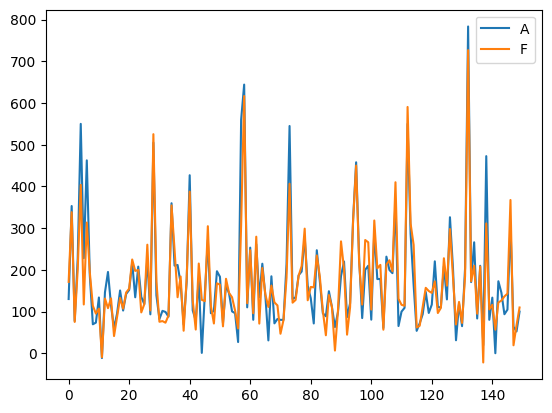

In [326]:
slice = 150
plt.plot(y_cv[:slice].reset_index(drop=True).index, y_cv[:slice])
plt.plot(pd.DataFrame(yhat[:slice]).index, yhat[:slice])
plt.legend("AF")

3. Extra: Propose a short optimisation of the asset on the period September –
December 2023 (1-2 slides)

In [372]:
date_debut = '2023-09-01'
date_fin = '2023-12-31'
date_filter = ((ppr_data['delivery_time_utc'] >= date_debut) & ((ppr_data['delivery_time_utc'] <= date_fin)))
date_filter_ = ((plf_data['delivery_time_utc'] >= date_debut) & ((plf_data['delivery_time_utc'] <= date_fin)))
date_filter__ = ((rpf_data['delivery_time_utc'] >= date_debut) & ((rpf_data['delivery_time_utc'] <= date_fin)))

ppr_data_asset = ppr_data[date_filter]
plf_data_asset = plf_data[date_filter_]
rpf_data_asset = rpf_data[date_filter__]

ppr_data_asset_mean = ppr_data_asset.groupby(ppr_data_asset["delivery_time_utc"].dt.date).mean().drop(columns=['delivery_time_utc'])
plf_data_asset_mean = plf_data_asset.groupby(plf_data_asset["delivery_time_utc"].dt.date).mean().drop(columns=['delivery_time_utc'])
rpf_data_asset_mean = rpf_data_asset.groupby(rpf_data_asset["delivery_time_utc"].dt.date).mean().drop(columns=['delivery_time_utc'])

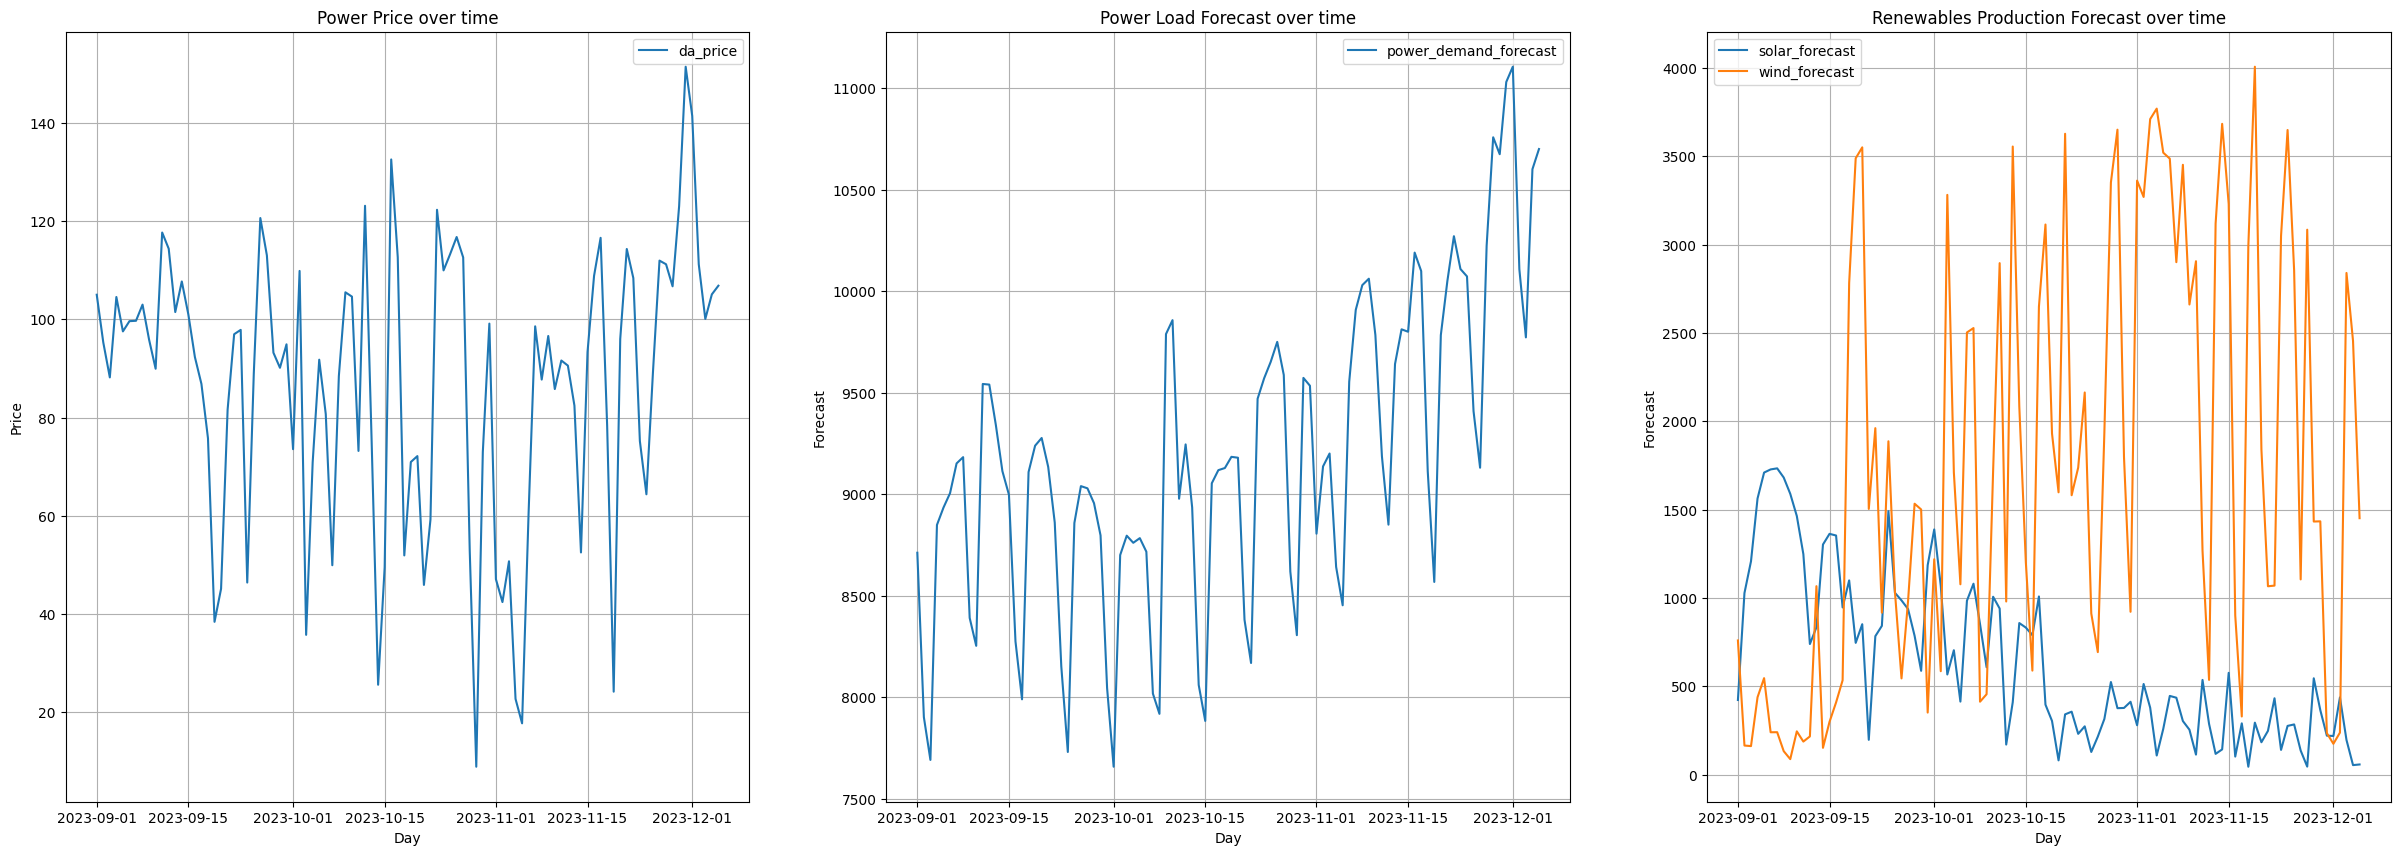

In [373]:
#Overview statistics
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30,10))

axes[0].plot(ppr_data_asset_mean["da_price"], label = 'da_price')
axes[0].set_title('Power Price over time')
axes[0].set_ylabel("Price")

axes[1].plot(plf_data_asset_mean["power_demand_forecast"], label = 'power_demand_forecast')
axes[1].set_title('Power Load Forecast over time')
axes[1].set_ylabel("Forecast")

axes[2].plot(rpf_data_asset_mean['solar_forecast'], label = 'solar_forecast')
axes[2].plot(rpf_data_asset_mean['wind_forecast'], label = 'wind_forecast')
axes[2].set_title('Renewables Production Forecast over time')
axes[2].set_ylabel("Forecast")

for ax in axes.flat[:]:    
    ax.set_xlabel('Day')
    ax.grid('on')
    ax.legend(loc='best')


Text(0, 0.5, 'Price')

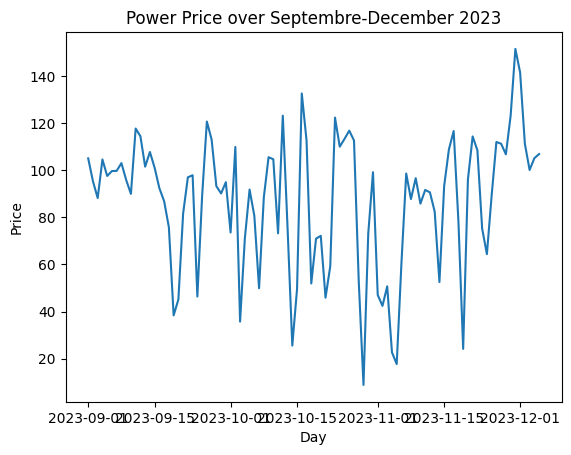

In [338]:
ppr_data_asset.groupby(ppr_data_asset['day']).mean()['da_price'].plot()
plt.title('Power Price over Septembre-December 2023')
plt.xlabel("Day")
plt.ylabel("Price")